In [1]:
# Import pandas, upload and read the data file

import pandas as pd

original_dataset = pd.read_csv("/content/Russia_Presedential_Election_2024.csv")

dataset = original_dataset.copy()

In [2]:
# Preview first few rows of the dataset

dataset.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [3]:
# Check for null values

dataset.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [5]:
# Analyze infomation and datatype of the dataset so that you can handle missing values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             1600 non-null   object 
 14  company_type         1600 non-null   object 
 15  weight1              1600 non-null   f

In [6]:
# Handling missing values in job_type & company_type and since both have object datatype we will fill missing values with 'Unknown' for simplicity.
# Also, since majority of records are missing for this feature we can move ahead with dropping these columns as they will not play crucial role in the analysis.

dataset["job_type"].fillna("Unknown", inplace=True)
dataset["company_type"].fillna("Unknown", inplace=True)

In [7]:
# Check once again if still there is any null value

dataset.isnull().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64

In [9]:
# Get the overview of the dataset including all the fields


dataset.describe(include="all")

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
count,1600,1600,1600.000000,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600.000000
unique,1600,2,NaN,8,7,4,6,7,6,6,6,6,11,7,22,NaN
top,07169ed8148ce047,female,NaN,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,Unknown,Unknown,NaN
freq,1,843,NaN,425,391,1361,1062,1128,490,613,690,949,535,908,721,NaN
mean,NaN,NaN,49.936250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
std,NaN,NaN,16.901797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327084
min,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468226
25%,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772224
50%,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921724
75%,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.158913


In [ ]:
'''
Since we do are unable to find precise and clear insights in data description including all the field in one, let's bifurcate numeric and categoric datatypes.

Let's calculate some basic descriptive statistics for both numerical and categorical variables.

Descriptive Statistics for Numerical Variables

age
weight1

Descriptive Statistics for Categorical Variables

sex
federal_district
type_of_city
knows_election_date
will_vote
candidate
television_usage
internet_usage
education
income
employment
job_type
company_type

In [11]:
# Analyze statistics for numerical variable

numerical_distribution = dataset[['age', 'weight1']].describe()

numerical_distribution

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [ ]:
'''
Summary of Numerical Variables Descriptive Statistics:

Age:

Mean: 49.94 years
Standard Deviation: 16.90 years
Minimum: 18 years
Maximum: 90 years

Weight1:

Mean: 1.0
Standard Deviation: 0.33
Minimum: 0.47
Maximum: 2.52
'''

In [12]:
# Analyze statistics for categorical variable

categoric_distribution = dataset.describe(include="object")

categoric_distribution

,id,sex,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type
count,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600
unique,1600,2,8,7,4,6,7,6,6,6,6,11,7,22
top,07169ed8148ce047,female,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,Unknown,Unknown
freq,1,843,425,391,1361,1062,1128,490,613,690,949,535,908,721


In [ ]:
'''
Categorical Variables:

Sex:

Female: 843 respondents
Male: 757 respondents

Federal District:

Most common: Central (425 respondents)
Others: Eight unique districts

Type of City:

Most common: City with population of 100-500k (391 respondents)
Others: Seven unique categories

Knows Election Date:

Most common: Named correct date (1361 respondents)
Others: Four unique categories

Will Vote:

Most common: Definitely yes (1062 respondents)
Others: Six unique categories

Candidate:

Most common: Putin (1128 respondents)
Others: Seven unique categories

Television Usage:

Most common: Less than 4 hours a day (490 respondents)
Others: Six unique categories

Internet Usage:

Most common: Less than 4 hours a day (613 respondents)
Others: Six unique categories

Education:

Most common: College (690 respondents)
Others: Six unique categories

Income:

Most common: Medium (949 respondents)
Others: Six unique categories

Employment:

Most common: Work for hire (535 respondents)
Others: Eleven unique categories

Job Type:

Most common: Unknown (908 respondents)
Others: Seven unique categories

Company Type:

Most common: Unknown (721 respondents)
Others: 22 unique categories
'''

In [ ]:
'''
Data Visualization :

Let's visualize some key aspects of the dataset to gain further insights. We can create the following plots:

- Distribution of age.
- Count of respondents by sex.
- Distribution of respondents across federal districts.
- Count of respondents by candidate preference.
- Distribution of television and internet usage.
- Relationship between age and candidate preference.

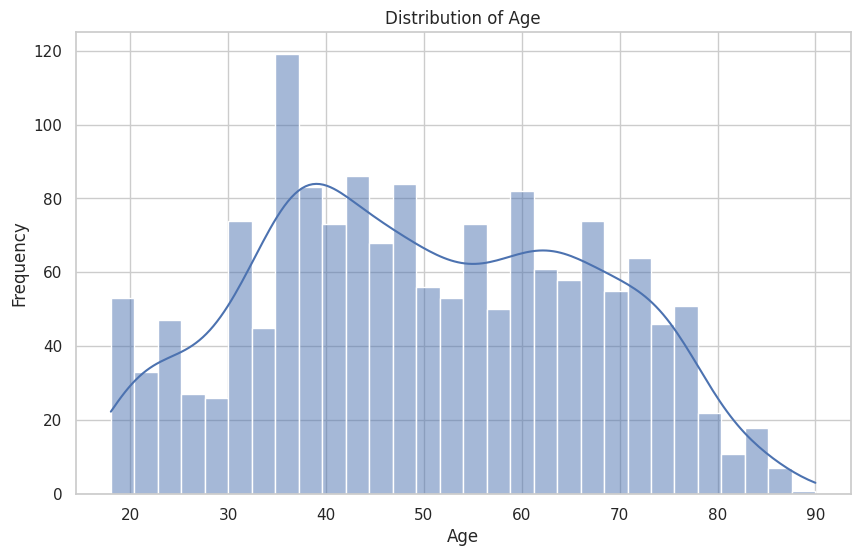

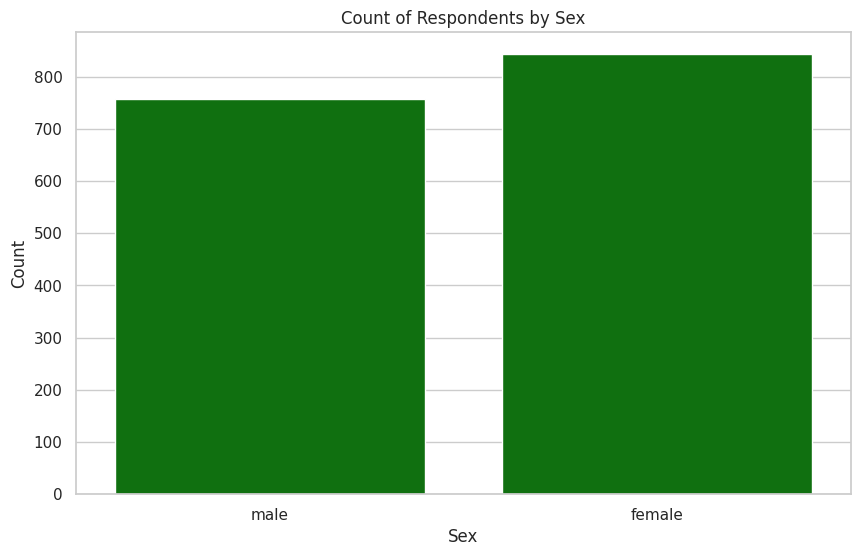

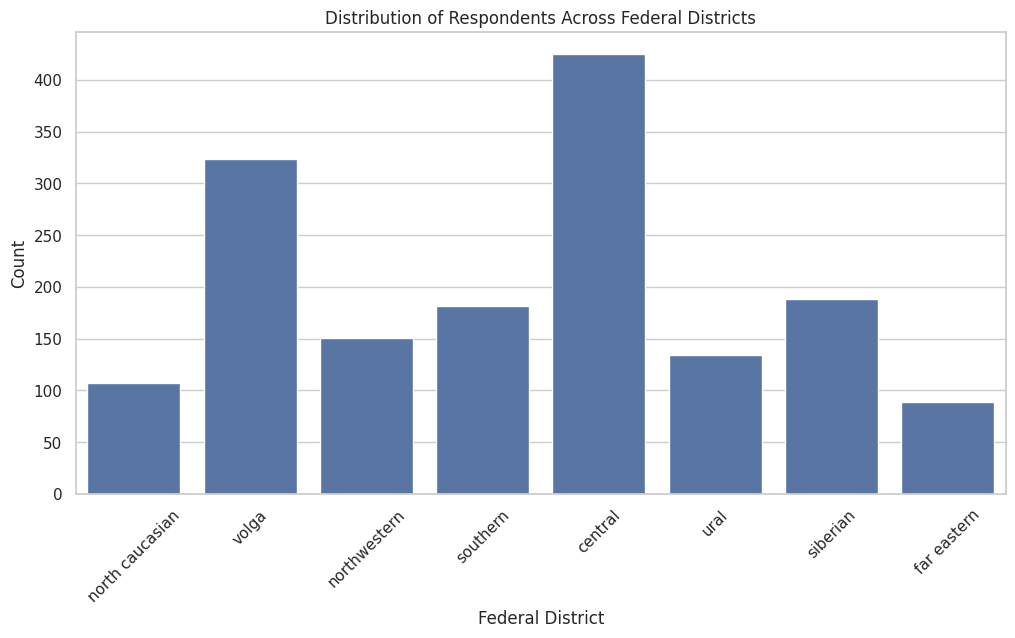

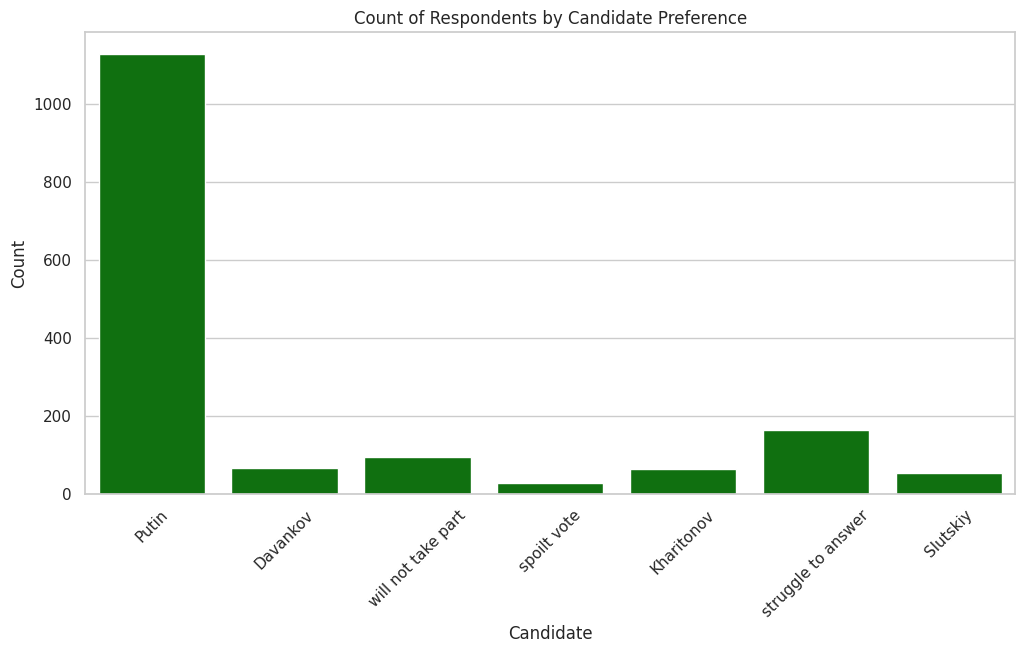

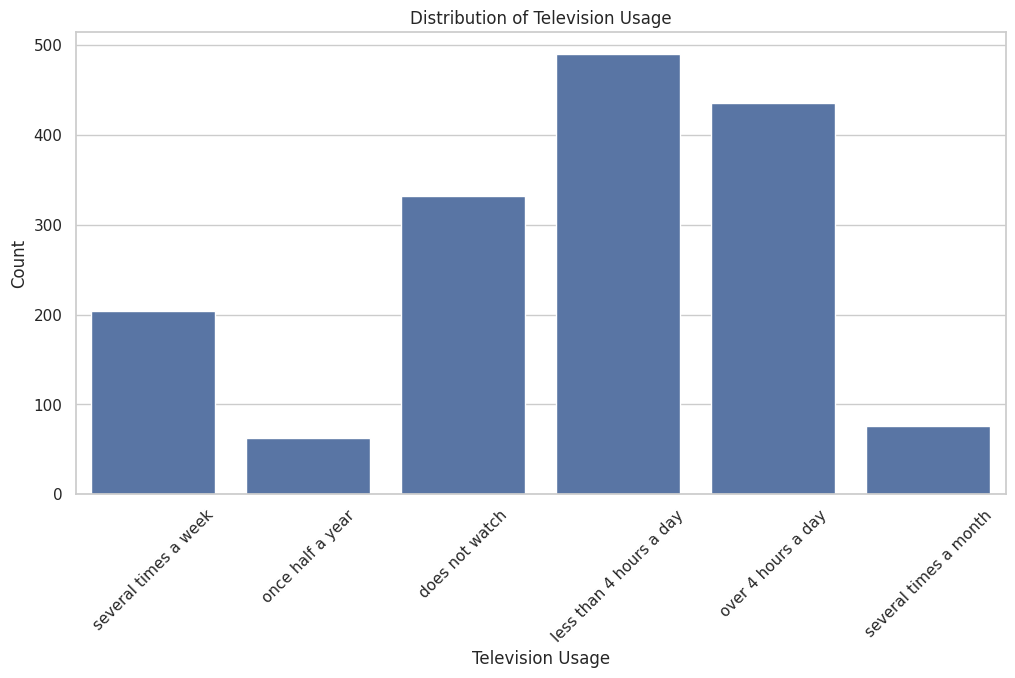

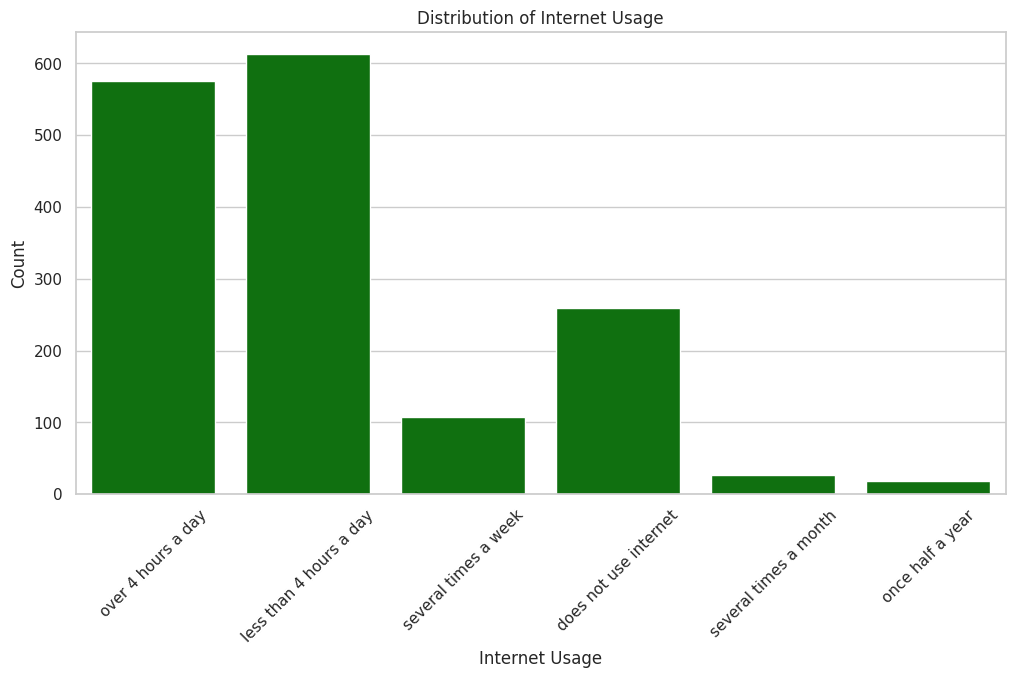

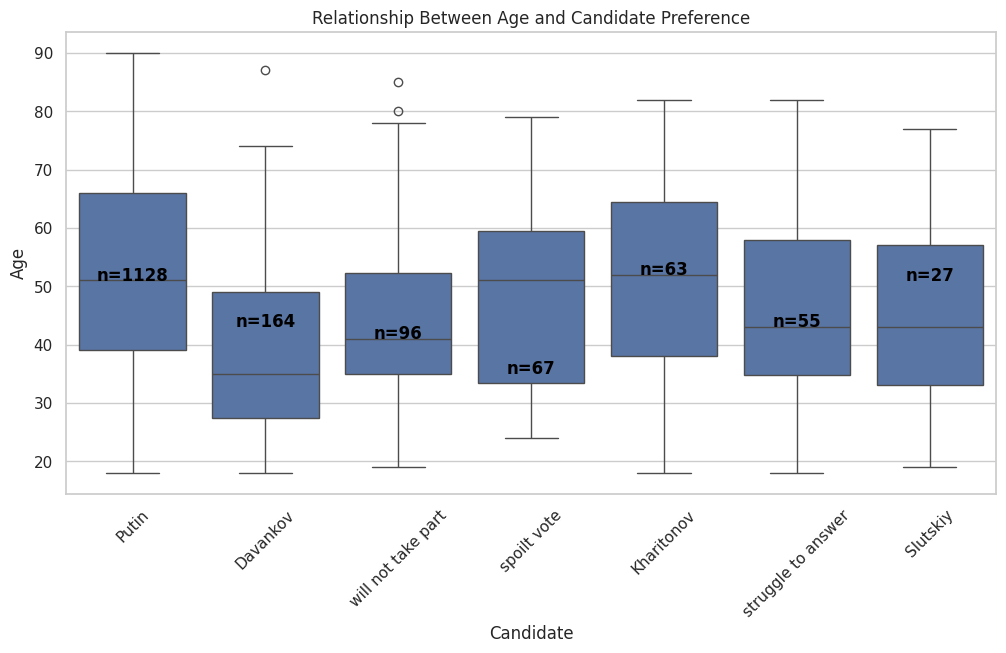

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(dataset['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Count of respondents by sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=dataset, color='green')
plt.title('Count of Respondents by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# 3. Distribution of respondents across federal districts
plt.figure(figsize=(12, 6))
sns.countplot(x='federal_district', data=dataset)
plt.title('Distribution of Respondents Across Federal Districts')
plt.xlabel('Federal District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Count of respondents by candidate preference
plt.figure(figsize=(12, 6))
sns.countplot(x='candidate', data=dataset, color='green')
plt.title('Count of Respondents by Candidate Preference')
plt.xlabel('Candidate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5. Distribution of television usage
plt.figure(figsize=(12, 6))
sns.countplot(x='television_usage', data=dataset)
plt.title('Distribution of Television Usage')
plt.xlabel('Television Usage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 6. Distribution of internet usage
plt.figure(figsize=(12, 6))
sns.countplot(x='internet_usage', data=dataset, color='green')
plt.title('Distribution of Internet Usage')
plt.xlabel('Internet Usage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 7. Relationship between age and candidate preference
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x='candidate', y='age', data=dataset)
plt.title('Relationship Between Age and Candidate Preference')
plt.xlabel('Candidate')
plt.ylabel('Age')
plt.xticks(rotation=45)
num_respondents = dataset['candidate'].value_counts()
for i, candidate in enumerate(num_respondents.index):
    count = num_respondents[candidate]
    plt.text(i, dataset[dataset['candidate'] == candidate]['age'].median(), f'n={count}',
             horizontalalignment='center', color='black', weight='semibold')
plt.show()